# Biodiversity & Species Conservation in National Parks

The data analysed in this project comes from the National Parks Service and contains information about endangered species in different parks. The general objective is to analyse the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. 

The data is divided in two files, which contain the following information:

* **species_info.csv** - contains data about different species and their conservation status
    * **category** - class of animal
    * **scientific_name** - the scientific name of each species
    * **common_name** - the common names of each species
    * **conservation_status** - each species' current conservation status


* **observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days
    * **scientific_name** - the scientific name of each species
    * **park_name** - Park where species were found
    * **observations** - the number of times each species was observed at the park

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load files
species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')


In [3]:
# Print first rows of the 'species' dataframe
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
# Print first rows of the 'obs' dataframe
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# Explore the data types and potential missing values from the species df
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [11]:
# Number of values in the 'category' variable in species df
species.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [13]:
# Number of values in the 'conservation_status' variable in species df
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [15]:
# Summary statistics from the species df
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [17]:
# Check for duplicates in the 'species' dataset
species.duplicated().value_counts()

False    5824
Name: count, dtype: int64

In [19]:
# Check for duplicates in the 'scientific_name' variable
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      283
Name: count, dtype: int64

In [21]:
duplicated_species = species[species.duplicated('scientific_name', keep=False) == True]

# Visualize the duplicated species in order to decide whether to drop them from the dataset
print(duplicated_species[duplicated_species.scientific_name == 'Puma concolor'])
print(duplicated_species[duplicated_species.scientific_name == 'Cervus elaphus'])
duplicated_species.head(8)

     category scientific_name                 common_names conservation_status
16     Mammal   Puma concolor      Panther (Mountain Lion)                 NaN
3022   Mammal   Puma concolor  Cougar, Mountain Lion, Puma                 NaN
4451   Mammal   Puma concolor                Mountain Lion                 NaN
     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk                 NaN
3017   Mammal  Cervus elaphus  Rocky Mountain Elk                 NaN


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",NaN
16,Mammal,Puma concolor,Panther (Mountain Lion),NaN
18,Mammal,Spilogale putorius,Eastern Spotted Skunk,NaN
20,Mammal,Lutra canadensis,Northern River Otter,NaN


In [23]:
# Check for duplicates in the 'common_names' variable
species.duplicated(subset=['common_names']).value_counts()

False    5504
True      320
Name: count, dtype: int64

### Data Exploration: Species Dataset

All the variables of the species dataframe are recognised as object data type, which is correct as none of the variables are numerical. The only variable of this dataset containing missing data is `conservation_status`. However, by looking at the categories within the `conservation_status` variable, we can see that there is no category for NOT threatened species. Therefore, it seems like the conservation status has only been recorded in those species cosidered at risk. Regarding the `category` variable, the species are divided into 7 different categories, of which the most abundant is 'Vascular Plant'. 

The descriptives table informs that the most frequent value for the `scientific_name` column is 'Castor canadensis' with a frequency of 3. As the scientific name of the species is unique, a frequency of more than 1 suggests the presence of duplicated values. In fact, a total of 283 values within the `scientific_name` variable seem to be duplicated, whereas no duplicate value was detected when looking at the **species** dataset as a whole. Having a closer look at the duplicated values in the `scientific_name` column, we observe that some observations have been given the same scientific name but slightly different annotations for the common names. For this reason, no duplicated values were found when looking at the dataset as a whole. On the other hand, the variable `common_names` seems to have an even higher number of duplicated values (a total of 320). It should be noted that the annotations in the `common_names` variable are not consistent and do not provide aditional information to the `scientific_name` variable. Therefore, for the purpose of this analysis, we decided to drop the duplicates of the `scientific_name` variable only. 

In [26]:
# Drop duplicates of the 'scientific_name' variable
species.drop_duplicates(subset=['scientific_name'],inplace=True)
len(species)

5541

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_24960\3786425537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(species['category'], palette='bright')


Text(0.5, 0, 'Count')

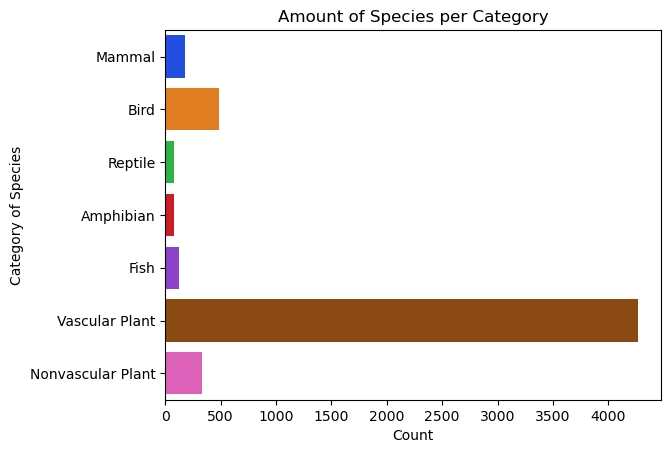

In [30]:
# Bar plot of the 'category' variable
sns.countplot(species['category'], palette='bright')
plt.title('Amount of Species per Category')
plt.ylabel('Category of Species')
plt.xlabel('Count')

In [44]:
# Create a subset of the 'species' dataframe containing threatened animals (animals without a NaN in the 'conservation_status' variable)
threatened = species.dropna(subset=['conservation_status'])
threatened.reset_index(drop=True, inplace=True)
threatened.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis latrans,Coyote,Species of Concern
1,Mammal,Canis lupus,Gray Wolf,Endangered
2,Mammal,Canis rufus,Red Wolf,Endangered
3,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_24960\424352745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(threatened['category'], palette='bright')


Text(0.5, 0, 'Count')

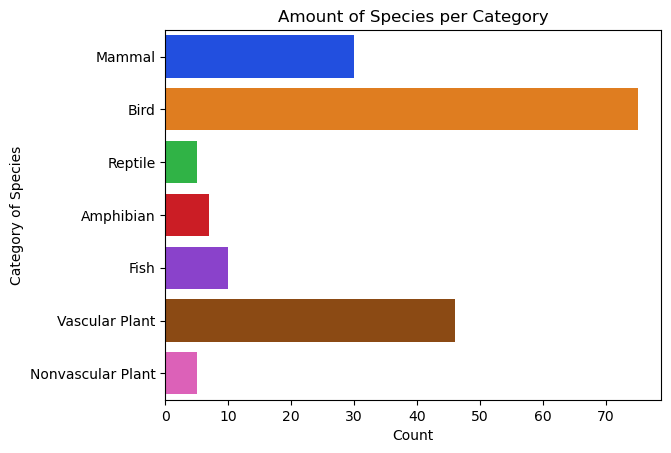

In [46]:
# Bar plot of the 'category' variable in the threatened group
sns.countplot(threatened['category'], palette='bright')
plt.title('Amount of Species per Category')
plt.ylabel('Category of Species')
plt.xlabel('Count')